# Regresión lineal por mínimos cuadrados: evaluación

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)


## Gráfica de residuos

Si la entrada es unidimensional, podemos evaluar el modelo mediante una **gráfica de residuos** que muestre $r_n=y_n-\hat{y}_n$ en función de $x_n$.

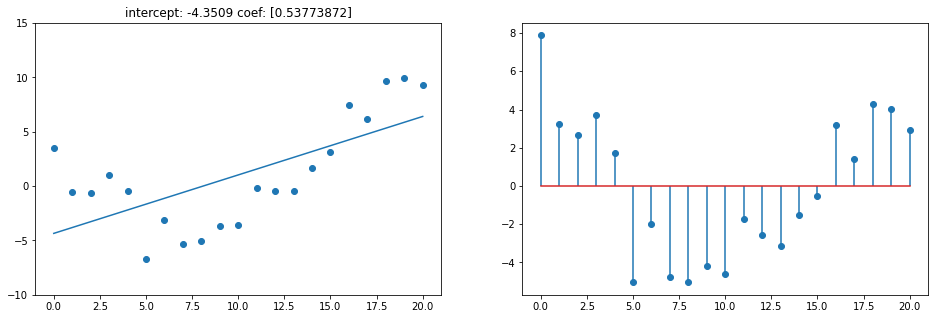

In [9]:
degree = 1 # prueba otros valores
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
regr = LinearRegression().fit(X_train_poly, y_train)
y_train_pred = regr.predict(X_train_poly)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].set_ylim([-10, 15]); axes[0].scatter(X_train, y_train)
axes[0].set_title('intercept: {:.4f} coef: {!s:.35s}'.format(regr.intercept_, regr.coef_))
axes[0].plot(X_train, regr.intercept_ + X_train_poly @ regr.coef_)
axes[1].stem(X_train, y_train - y_train_pred);

## Gráfica $\hat{y}_n$ vs $y_n$

Si la entrada es multidimensional, podemos evaluar el modelo mediante una gráfica que muestre $\hat{y}_n$ en función de $y_n$; mejor cuanto más próxima a la diagonal.

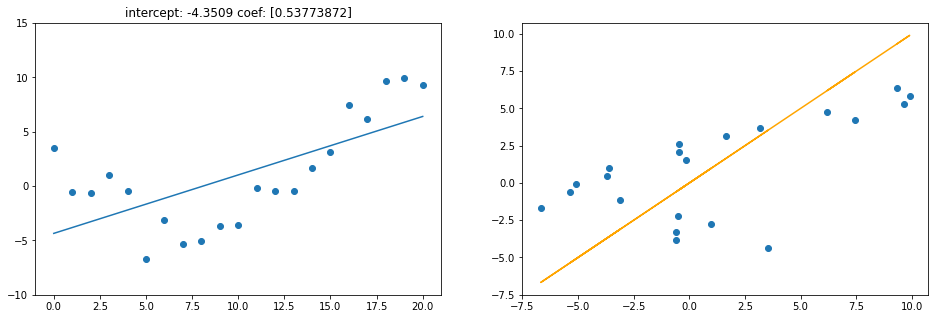

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].set_ylim([-10, 15]); axes[0].scatter(X_train, y_train)
axes[0].set_title('intercept: {:.4f} coef: {!s:.35s}'.format(regr.intercept_, regr.coef_))
axes[0].plot(X_train, regr.intercept_ + X_train_poly @ regr.coef_)
axes[1].plot(y_train, y_train, color='orange')
axes[1].scatter(y_train, y_train_pred);

## Precisión de la predicción y $R^2$

Una medida obvia para evaluar la calidad de un modelo es la **suma residual de cuadrados:**
$$\operatorname{RSS}(\boldsymbol{w})=\frac{1}{2}\sum_n(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2$$
Equivalentemente, podemos usar la **raíz del error cuadrático medio (RMSE):**
$$\operatorname{RMSE}(\boldsymbol{w})=\sqrt{\frac{1}{N}\operatorname{RSS}(\boldsymbol{w})}$$
Una medida muy fácil de interpretar es el **coeficiente de determinación:**
$$R^2=1-\frac{\operatorname{RSS}}{\operatorname{TSS}}$$
donde $\operatorname{TSS}$ es la **suma de cuadrados total,**
$$\operatorname{TSS}(\boldsymbol{w})=\sum_n (y_n-\bar{y})^2%
\quad\text{con}\quad%
\bar{y}=\frac{1}{N}\sum_n y_n$$
Intuitivamente, $R^2$ mide la varianza de las predicciones en relación con predecir siempre la media empírica, $\bar{y}$. Se puede comprobar que $0\leq R^2\leq 1$; en general, cuanto mayor sea, mayor será la reducción de la varianza, esto es, mejor será el ajuste.

In [11]:
r2 = r2_score(y_train, y_train_pred)
print('R2 en entrenamiento: {:.4f}'.format(r2))

R2 en entrenamiento: 0.4344
